In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pyplot
import seaborn as sns

In [4]:
data = pd.read_csv("AmazonSalesData.csv")

In [6]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [8]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [12]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [16]:
data.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
min,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05


In [18]:
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Date MonthYear'] = data['Order Date'].dt.strftime('%Y-%m')
data = data.drop(columns=['Order Date'])

In [20]:
df = data

In [24]:
df.isnull().sum()

Region                  0
Country                 0
Item Type               0
Sales Channel           0
Order Priority          0
Order ID                0
Ship Date               0
Units Sold              0
Unit Price              0
Unit Cost               0
Total Revenue           0
Total Cost              0
Total Profit            0
Order Month             0
Order Year              0
Order Date MonthYear    0
dtype: int64

<Axes: >

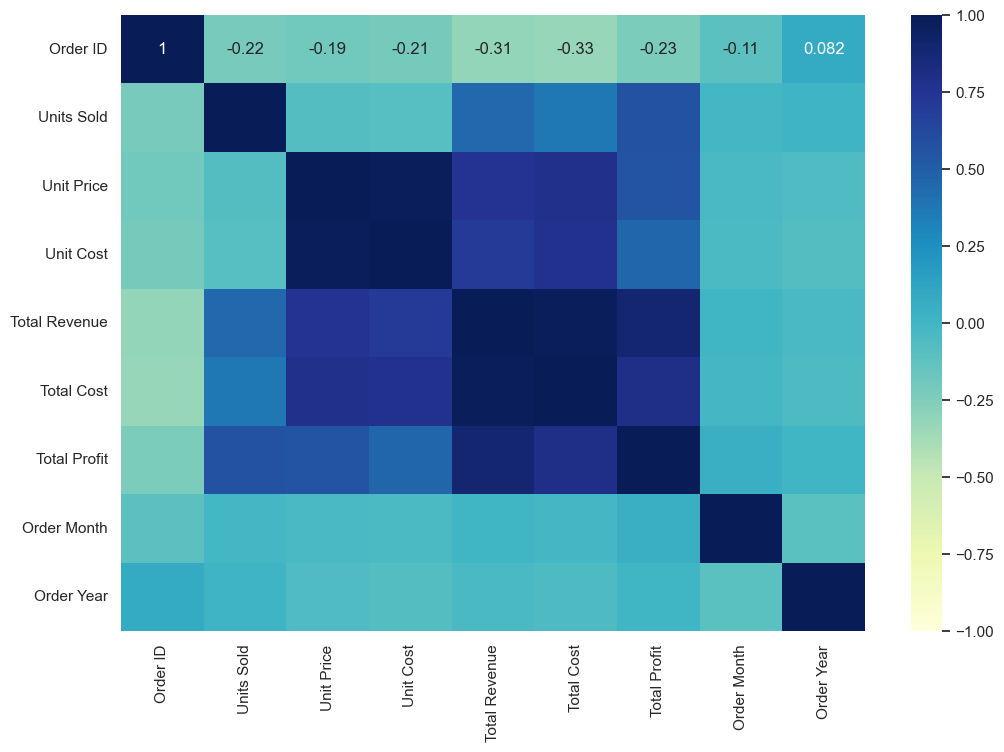

In [179]:
# Heatmap 

plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include=['number']).corr(method='pearson'), annot=True, vmin=-1, vmax=1, cmap='YlGnBu')

In [30]:
# To Display Regions

pd.set_option('display.max_rows', None)
df['Region'].value_counts()

Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64

In [32]:
pd.set_option('display.max_rows', None)
df['Country'].value_counts()

Country
The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote

In [34]:
pd.set_option('display.max_rows', None)
df['Item Type'].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

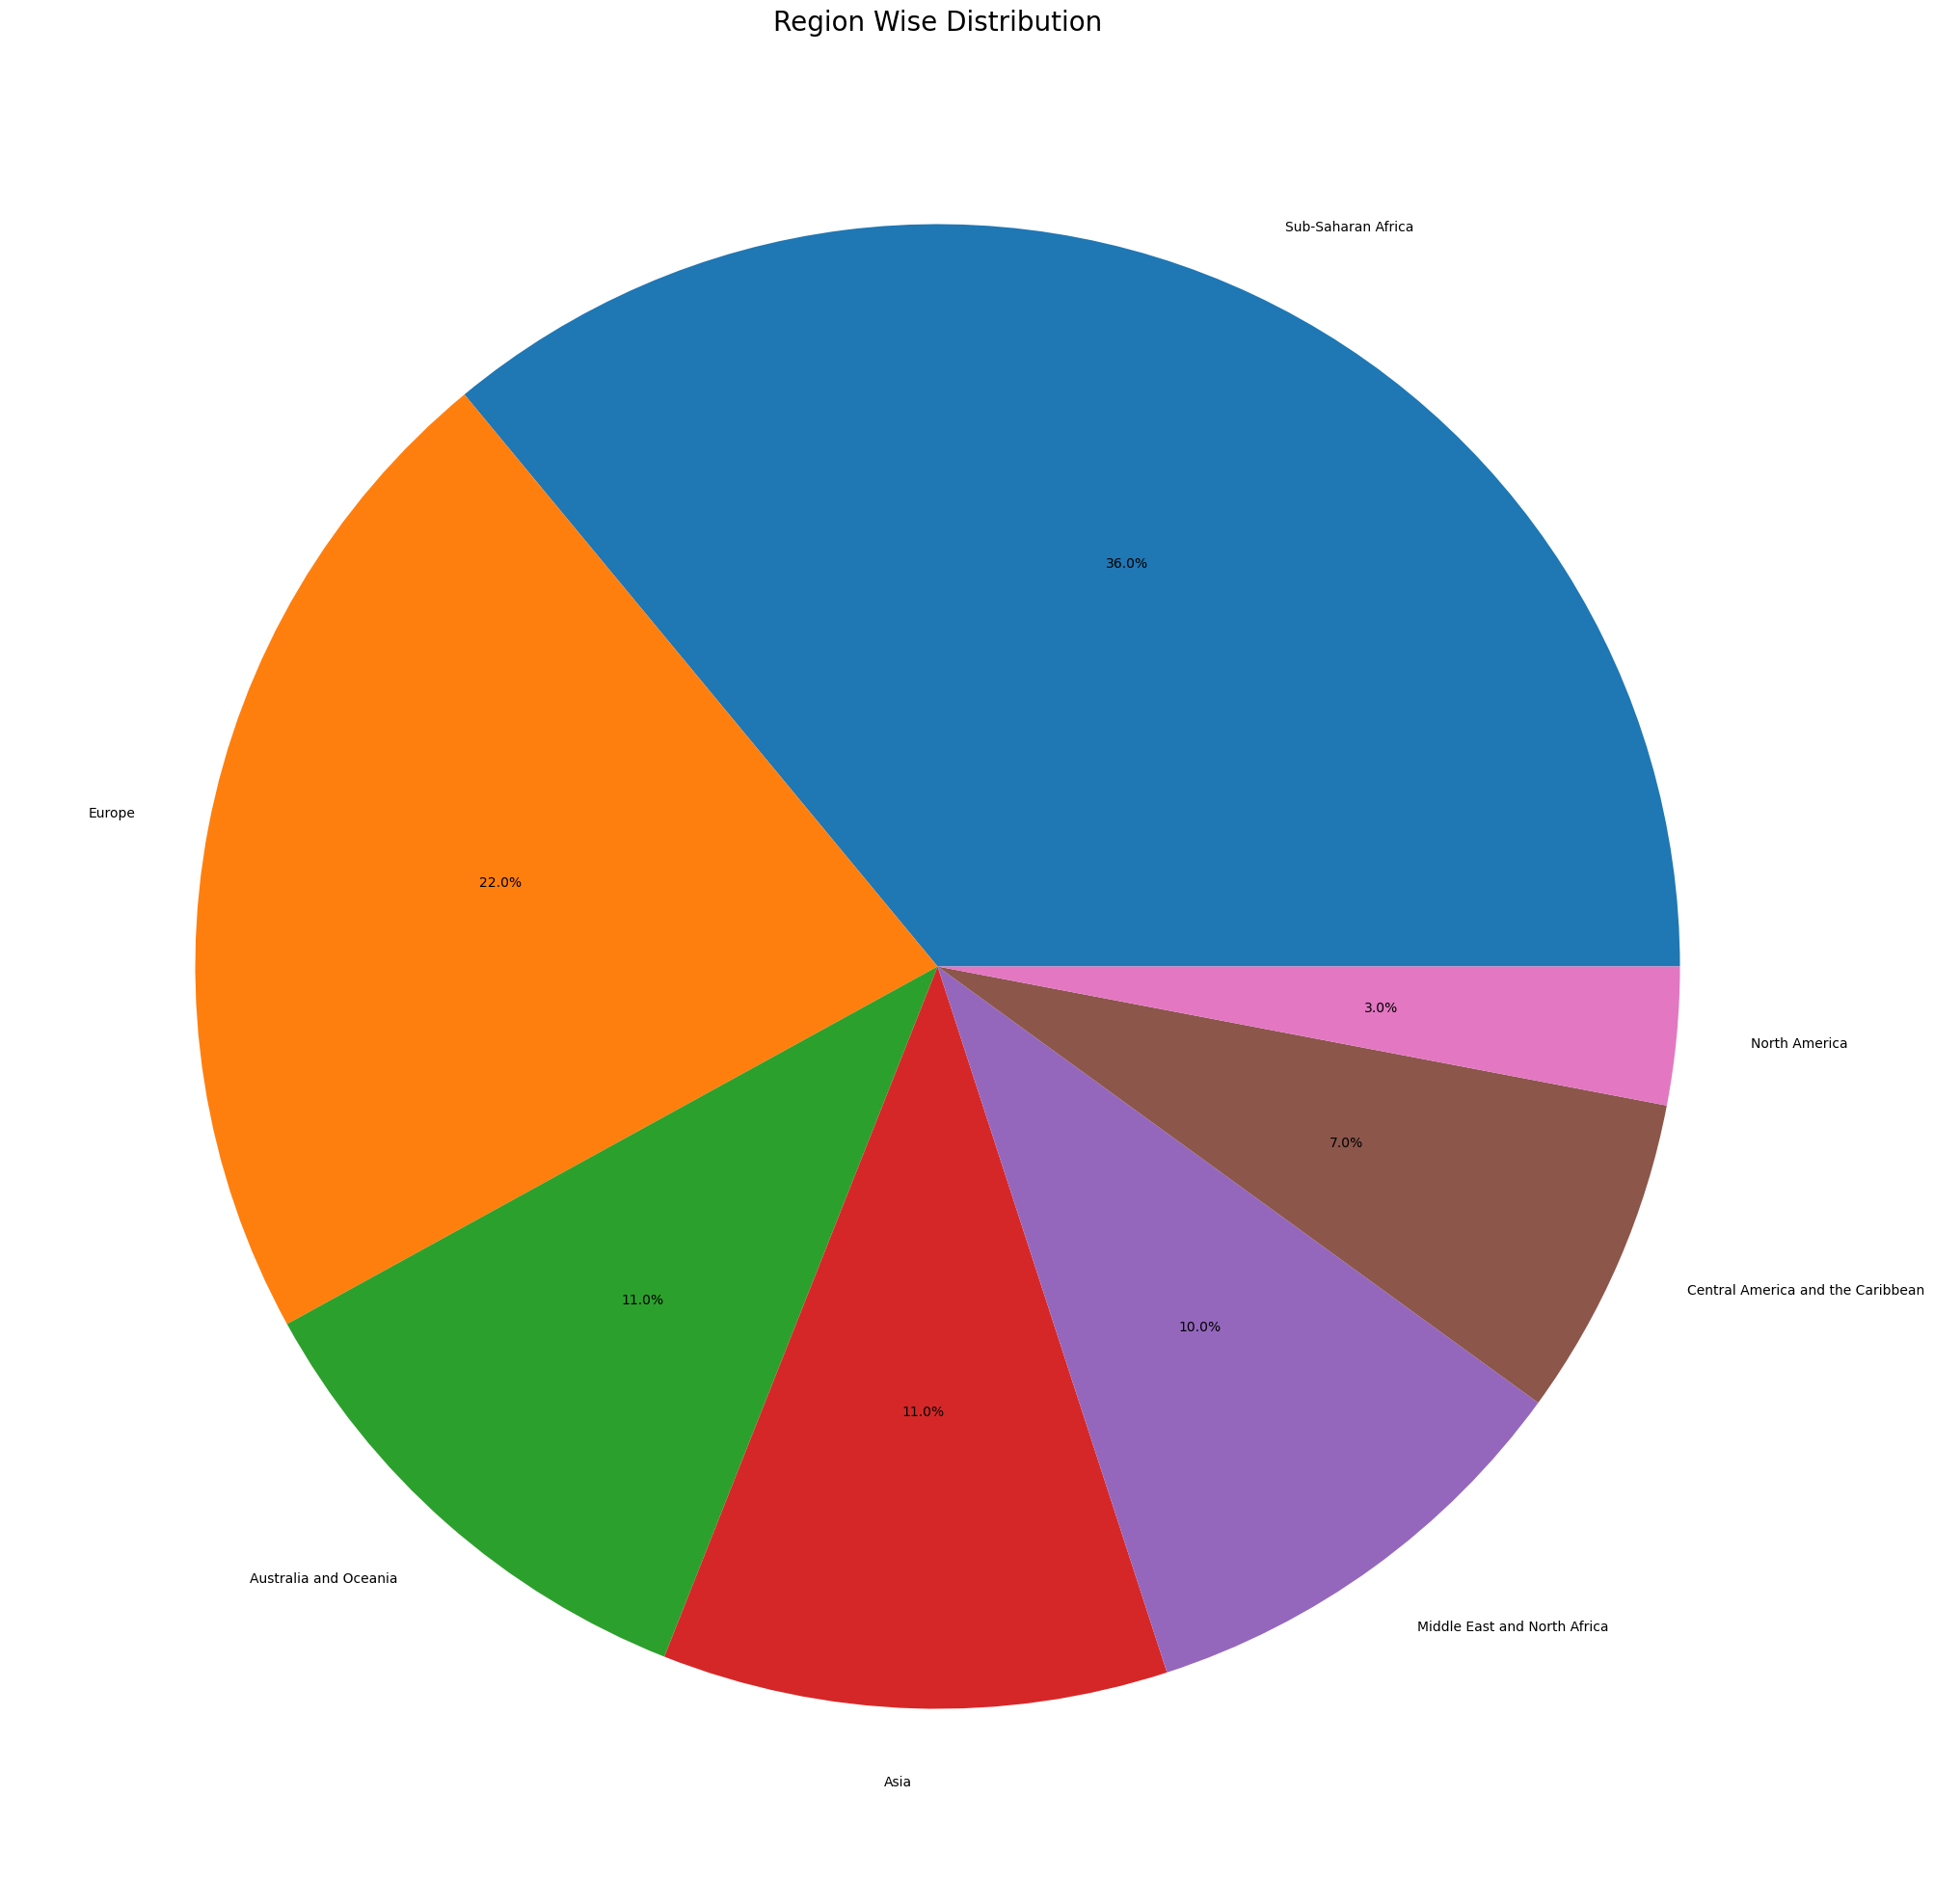

In [48]:
import matplotlib.pyplot as plt
region_names = df.Region.value_counts().index
region_val = df.Region.value_counts().values
fig,ax = plt.subplots(figsize=(25,25))
plt.title('Region Wise Distribution', fontsize=20)
ax.pie(region_val,labels=region_names,autopct='%1.1f%%')
plt.show()

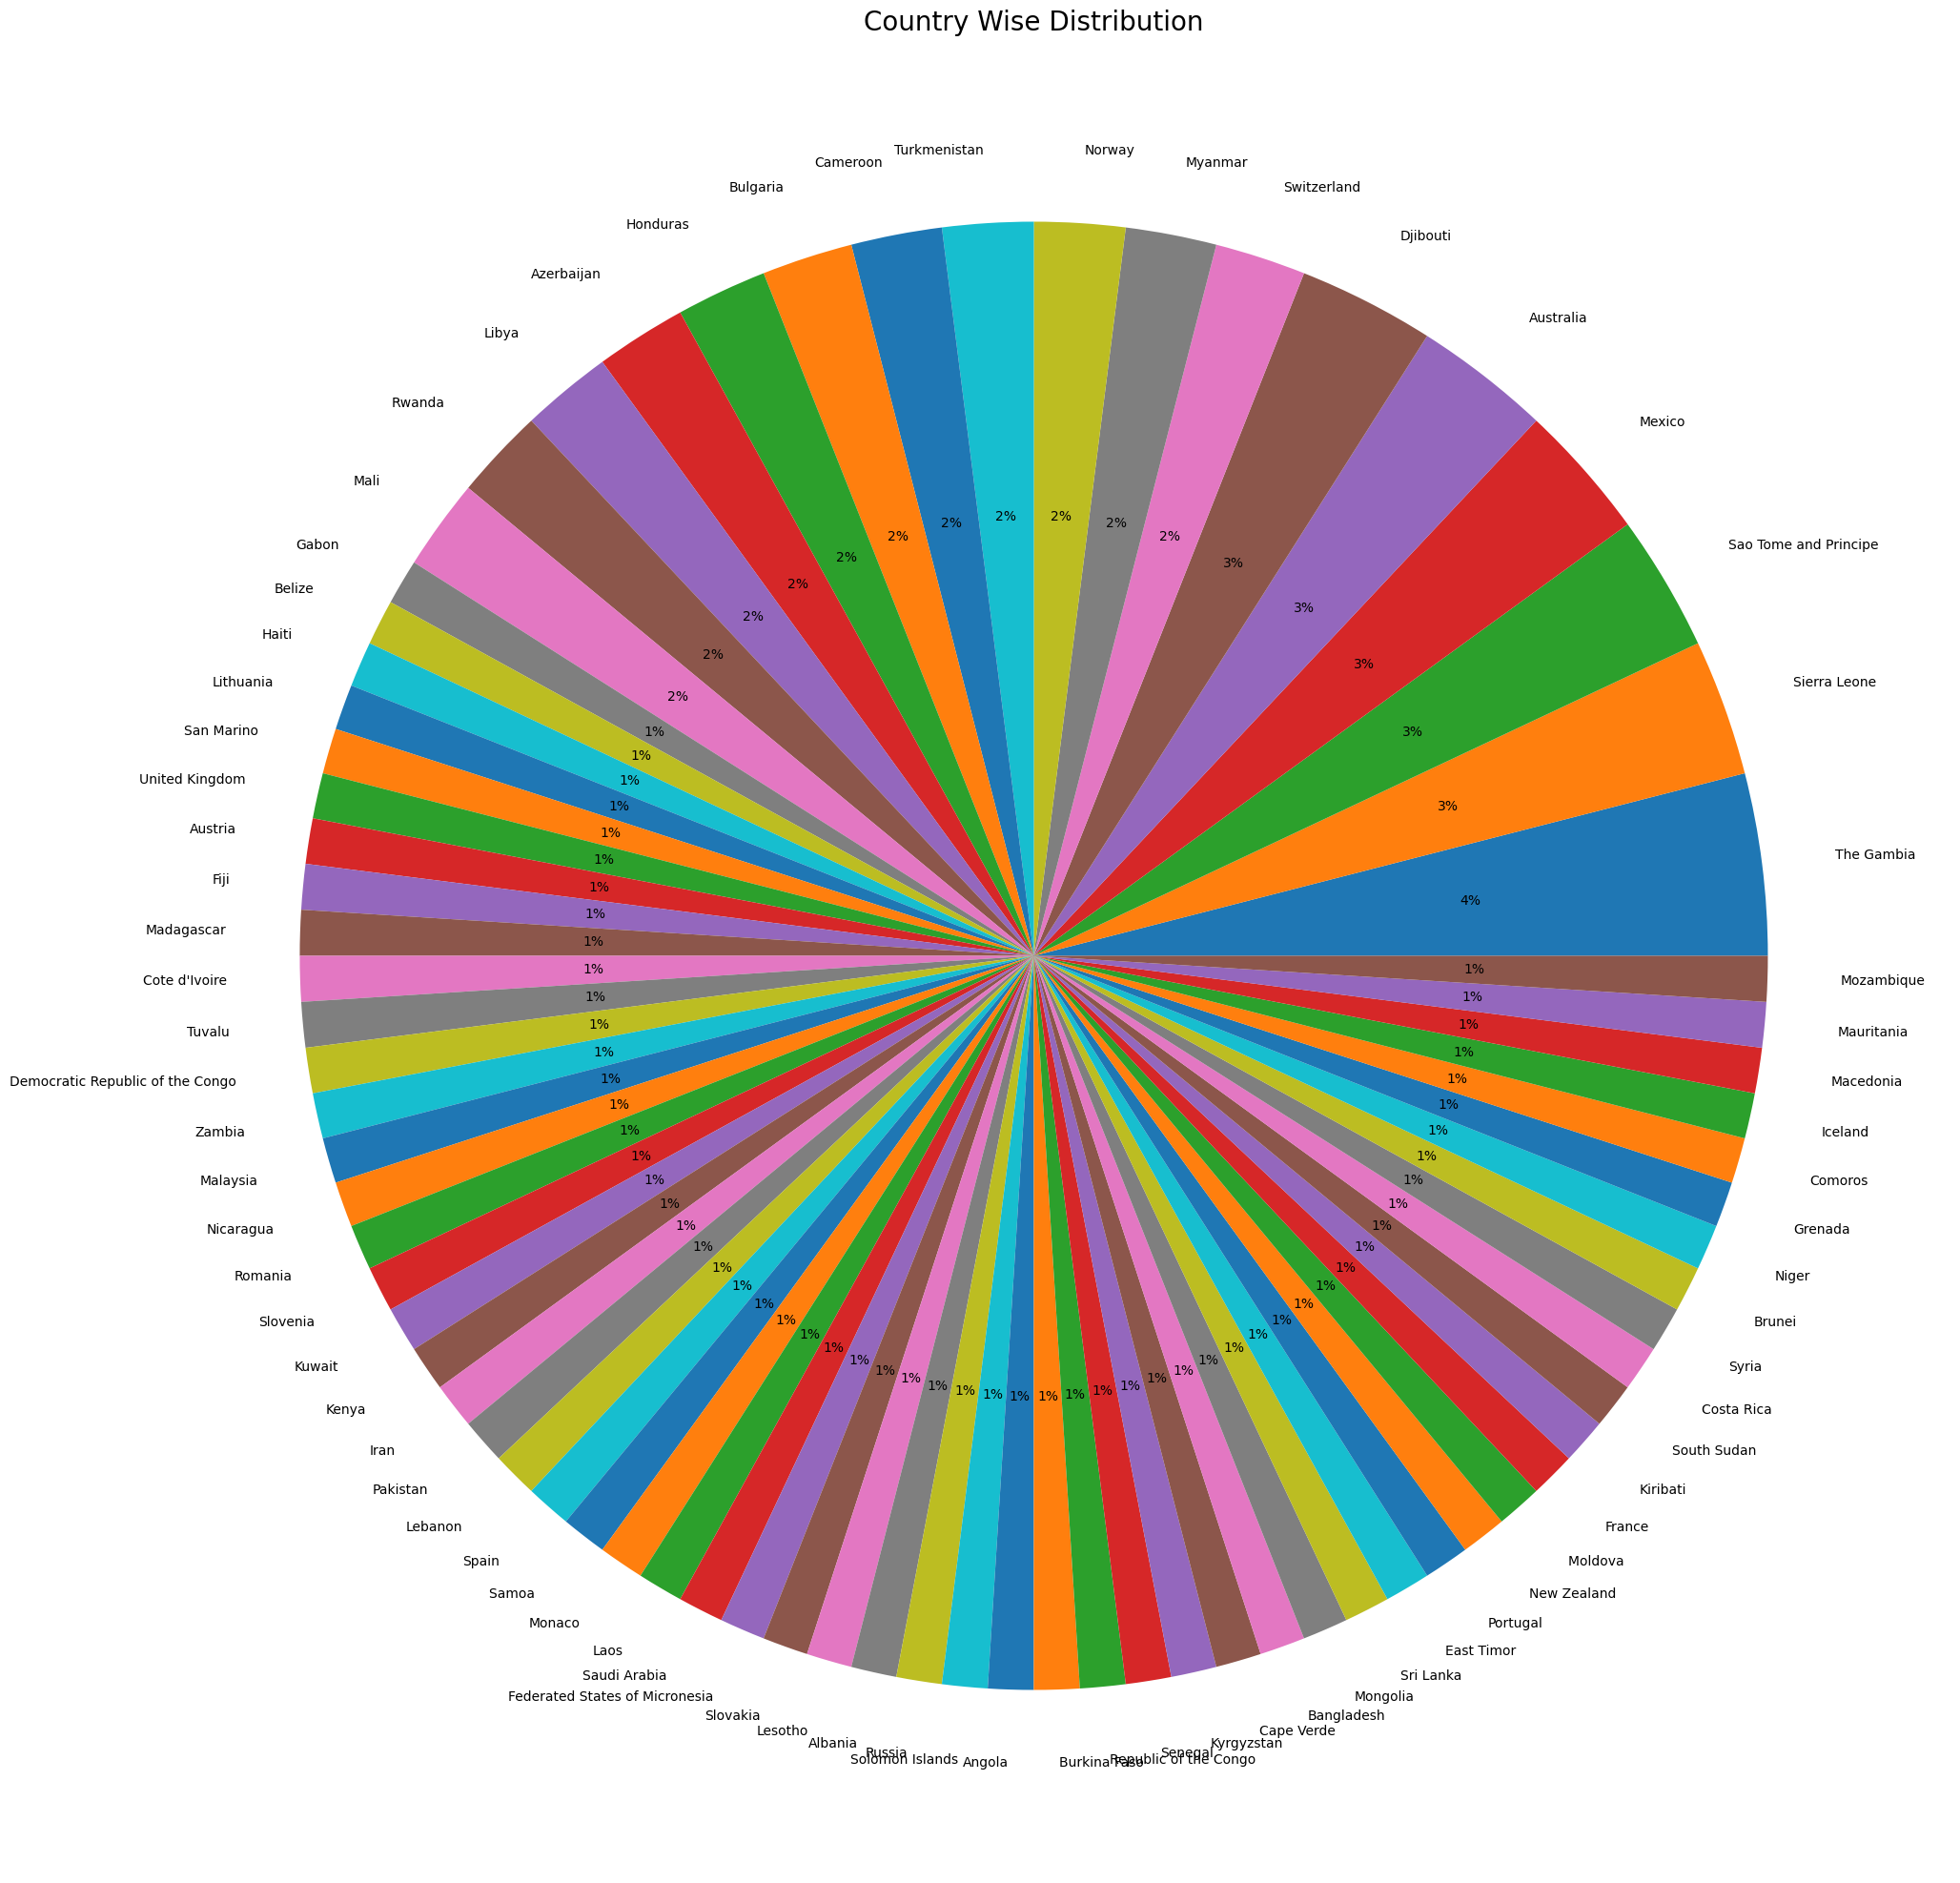

In [50]:
import matplotlib.pyplot as plt 
country_names = df.Country.value_counts().index
country_val = df.Country.value_counts().values
fig,ax = plt.subplots(figsize=(25,25))
ax.pie(country_val,labels=country_names,autopct='%1.f%%')
plt.title('Country Wise Distribution', fontsize=20)
plt.show()

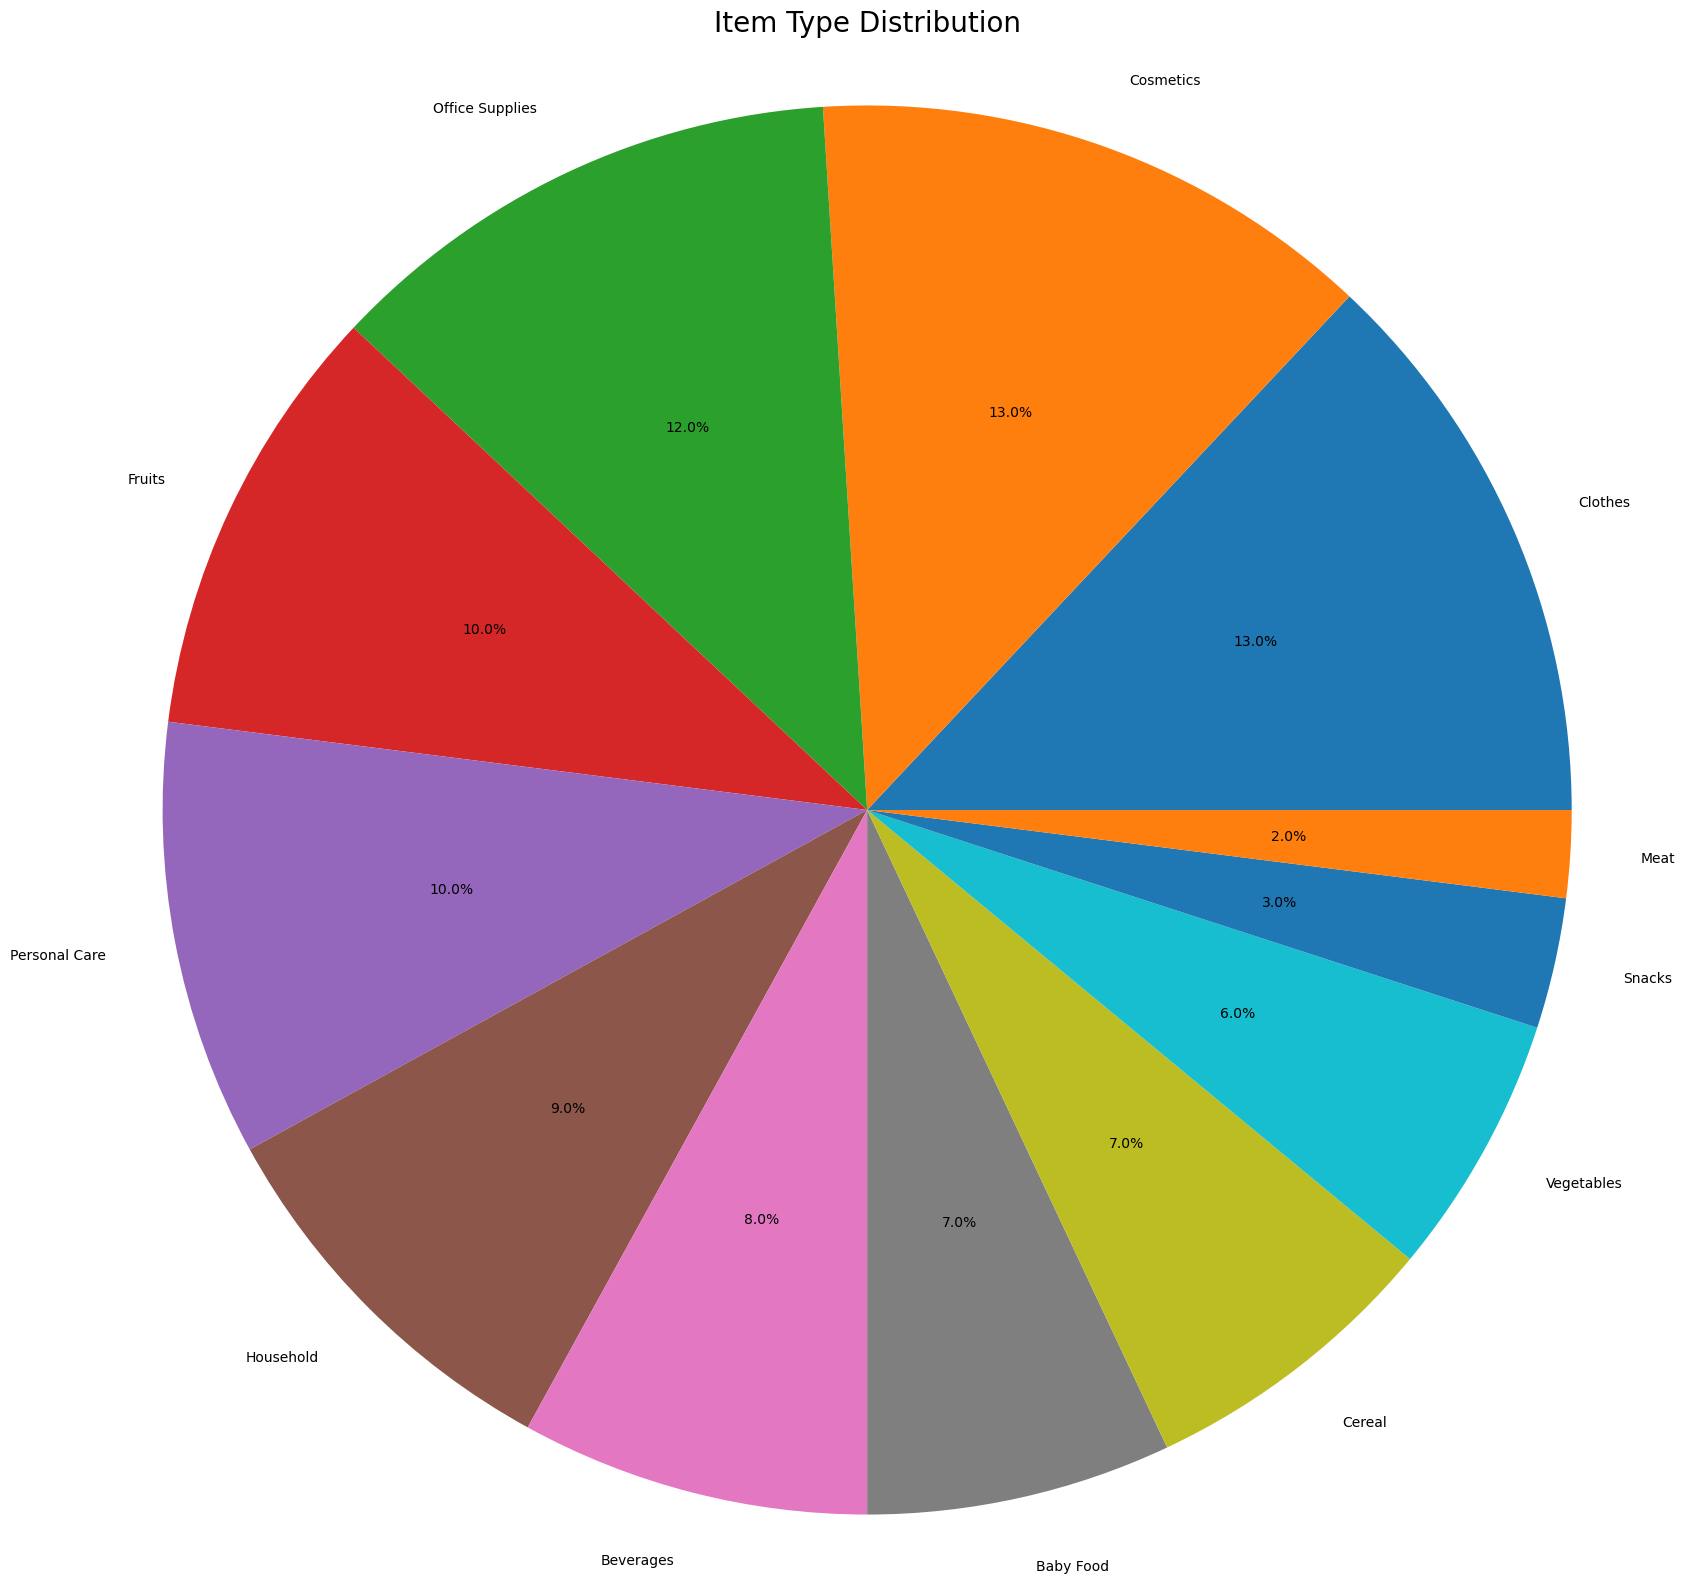

In [56]:
import matplotlib.pyplot as plt
item_types = [
    "Clothes", "Cosmetics", "Office Supplies", "Fruits", "Personal Care", 
    "Household", "Beverages", "Baby Food", "Cereal", "Vegetables", 
    "Snacks", "Meat"
]
counts = [13, 13, 12, 10, 10, 9, 8, 7, 7, 6, 3, 2]

plt.figure(figsize=(20, 20))
plt.pie(counts, labels=item_types, autopct='%1.1f%%')

plt.title('Item Type Distribution', fontsize=20)
plt.axis('equal')
plt.show()


In [102]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2nd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [60]:
outliers = detect_outliers(df, df["Total Profit"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                               Europe
Coun

In [64]:
print (outliers)

[13, 30, 33, 46, 74, 79, 93]


In [92]:
outliers = detect_outliers(df, df["Total Cost"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [94]:
print(outliers)

[13, 33, 38, 68, 75]


In [96]:
outliers = detect_outliers(df, df["Total Revenue"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [98]:
print(outliers)

[13, 33, 38, 68, 74, 75]


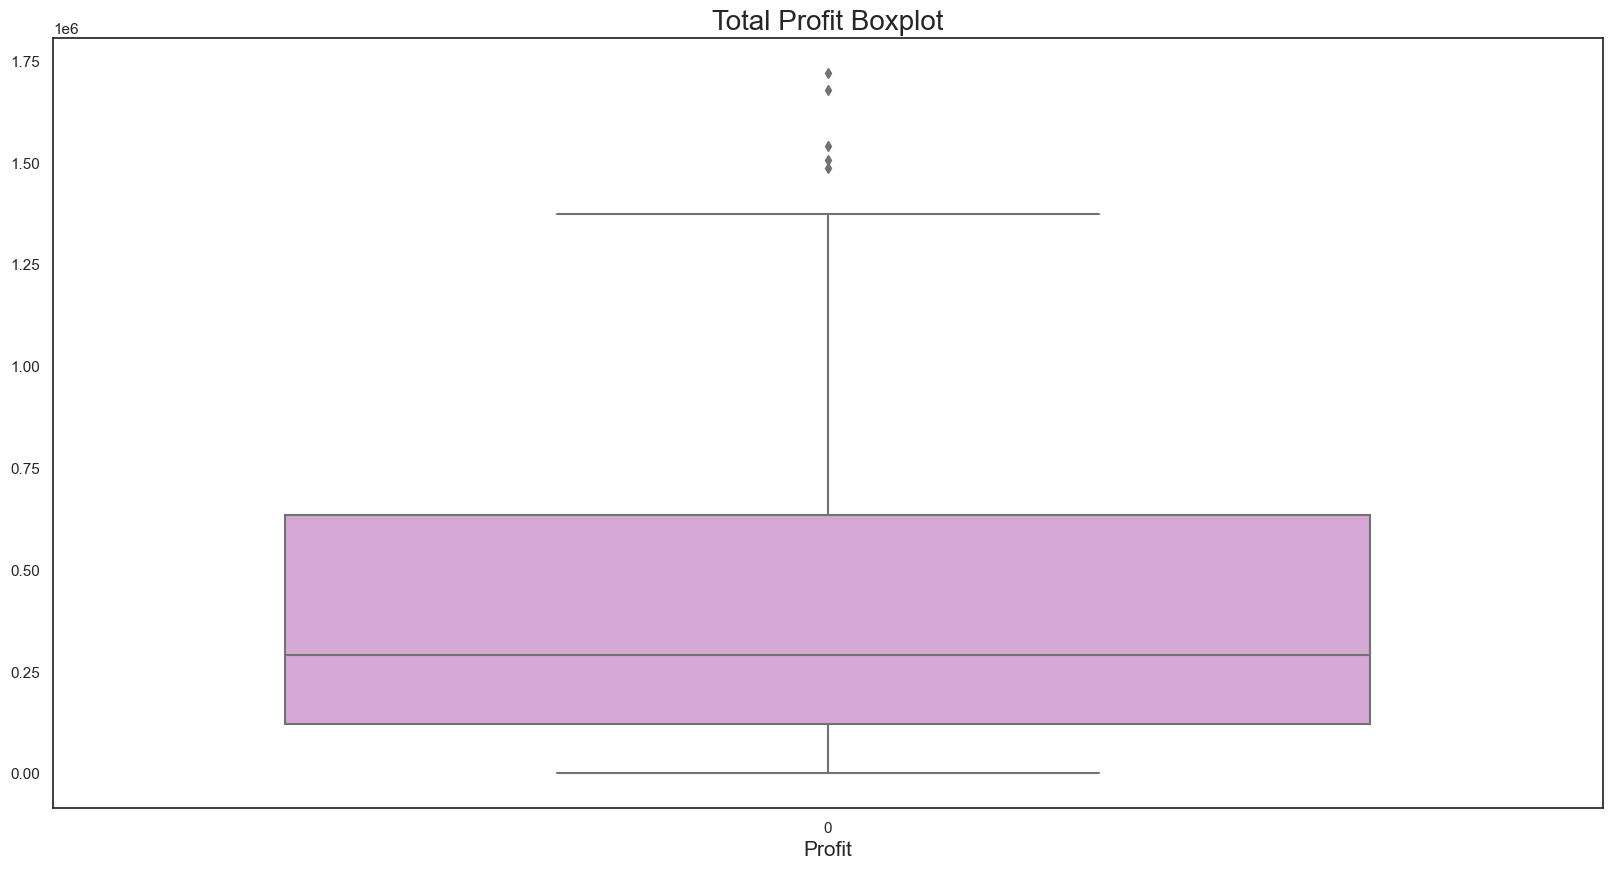

In [145]:
# Box Plot for Total Profit

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(df['Total Profit'], color="plum", width=.7, ax=ax)
plt.title('Total Profit Boxplot', fontsize=20)
plt.xlabel('Profit', fontsize=15)
plt.show()

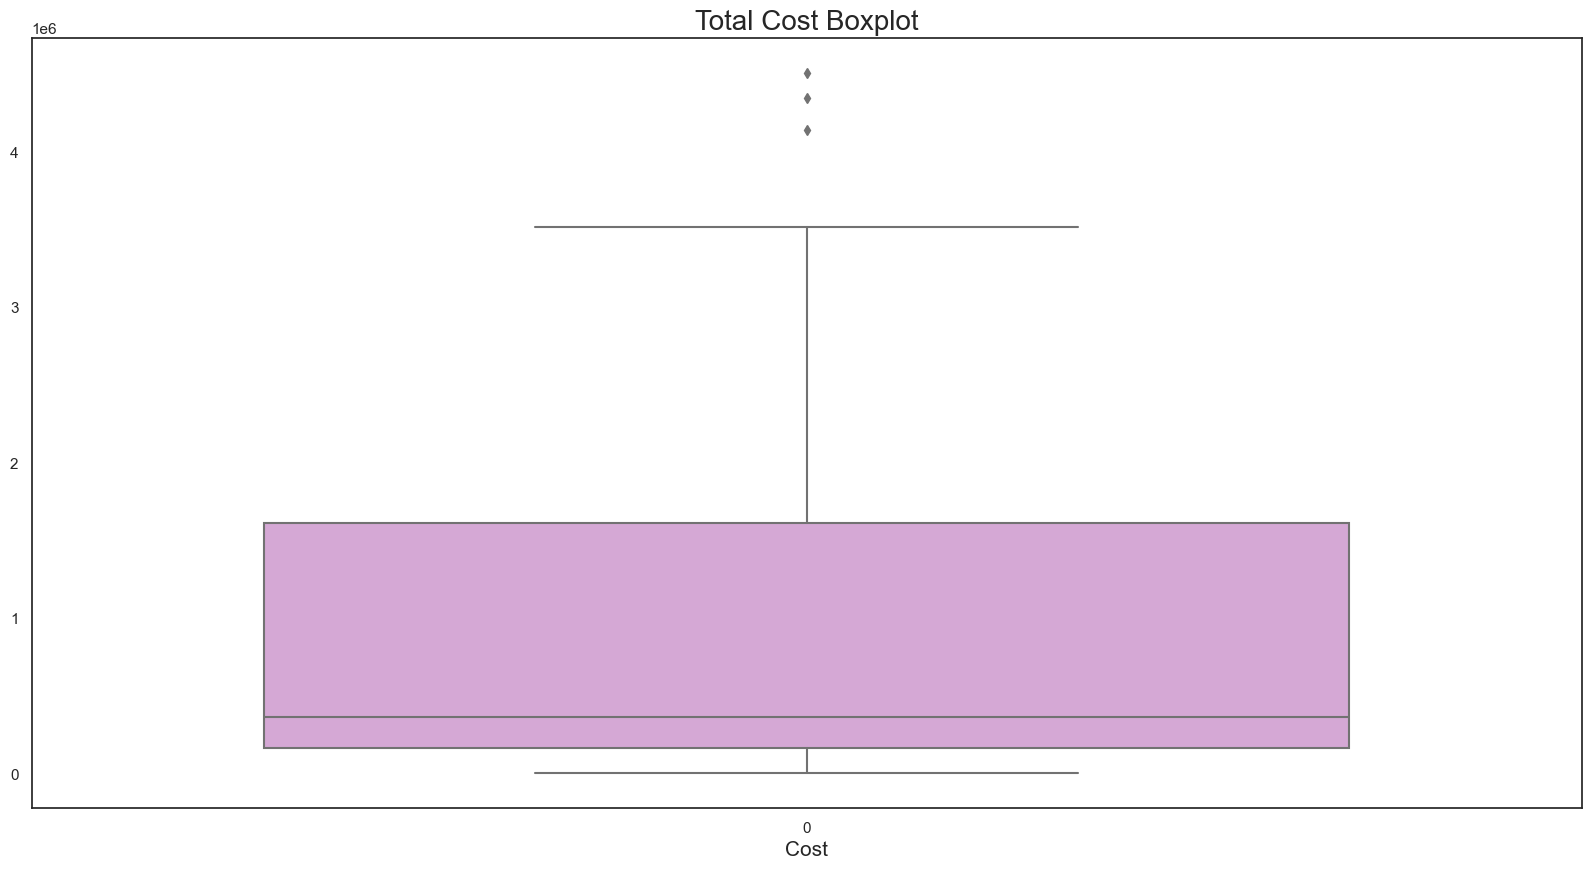

In [149]:
# Box Plot for Total Cost

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(df['Total Cost'], color="plum", width=.7, ax=ax)
plt.title('Total Cost Boxplot', fontsize=20)
plt.xlabel('Cost', fontsize=15)
plt.show()

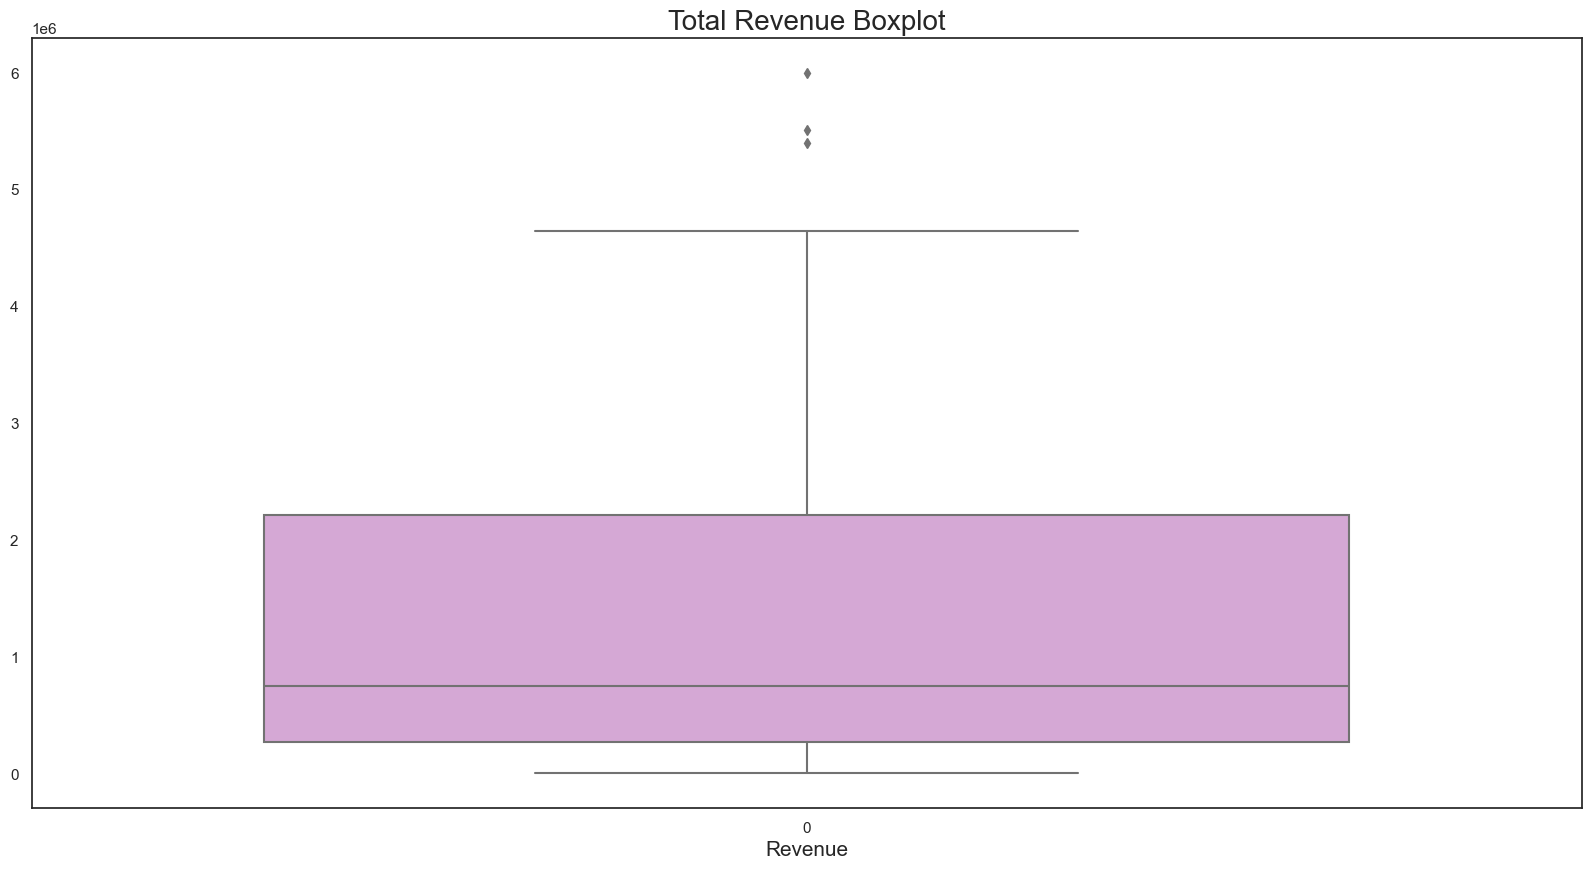

In [151]:
# Box Plot for Total Revenue

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(df['Total Revenue'], color="plum", width=.7, ax=ax)
plt.title('Total Revenue Boxplot', fontsize=20)
plt.xlabel('Revenue', fontsize=15)
plt.show()

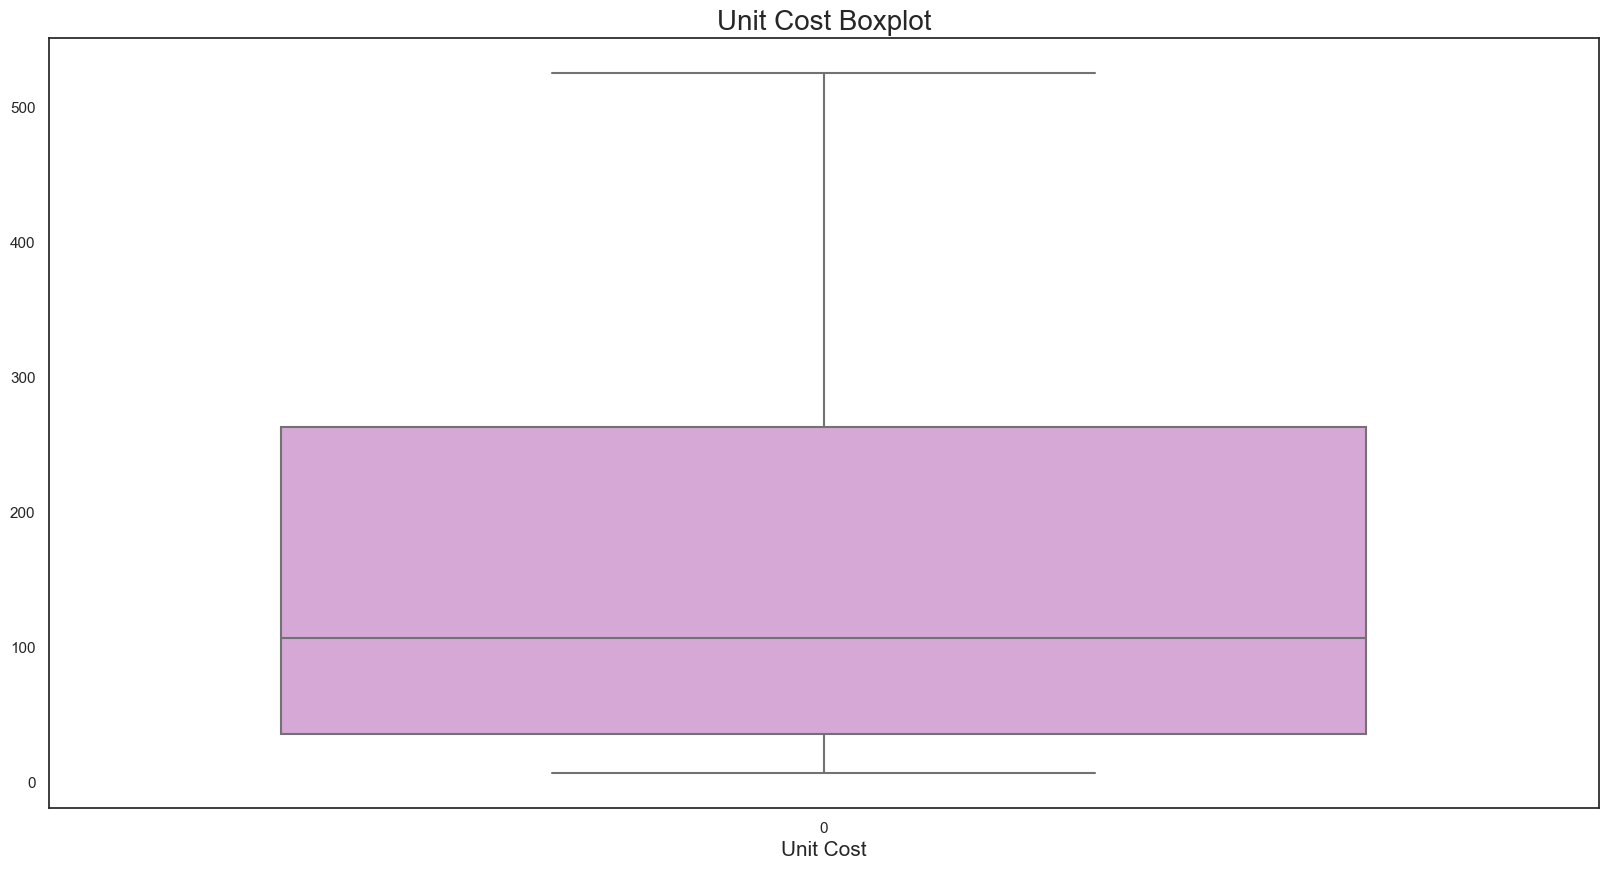

In [153]:
# Box Plot for Unit Cost

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(df['Unit Cost'], color="plum", width=.7, ax=ax)
plt.title('Unit Cost Boxplot', fontsize=20)
plt.xlabel('Unit Cost', fontsize=15)
plt.show()

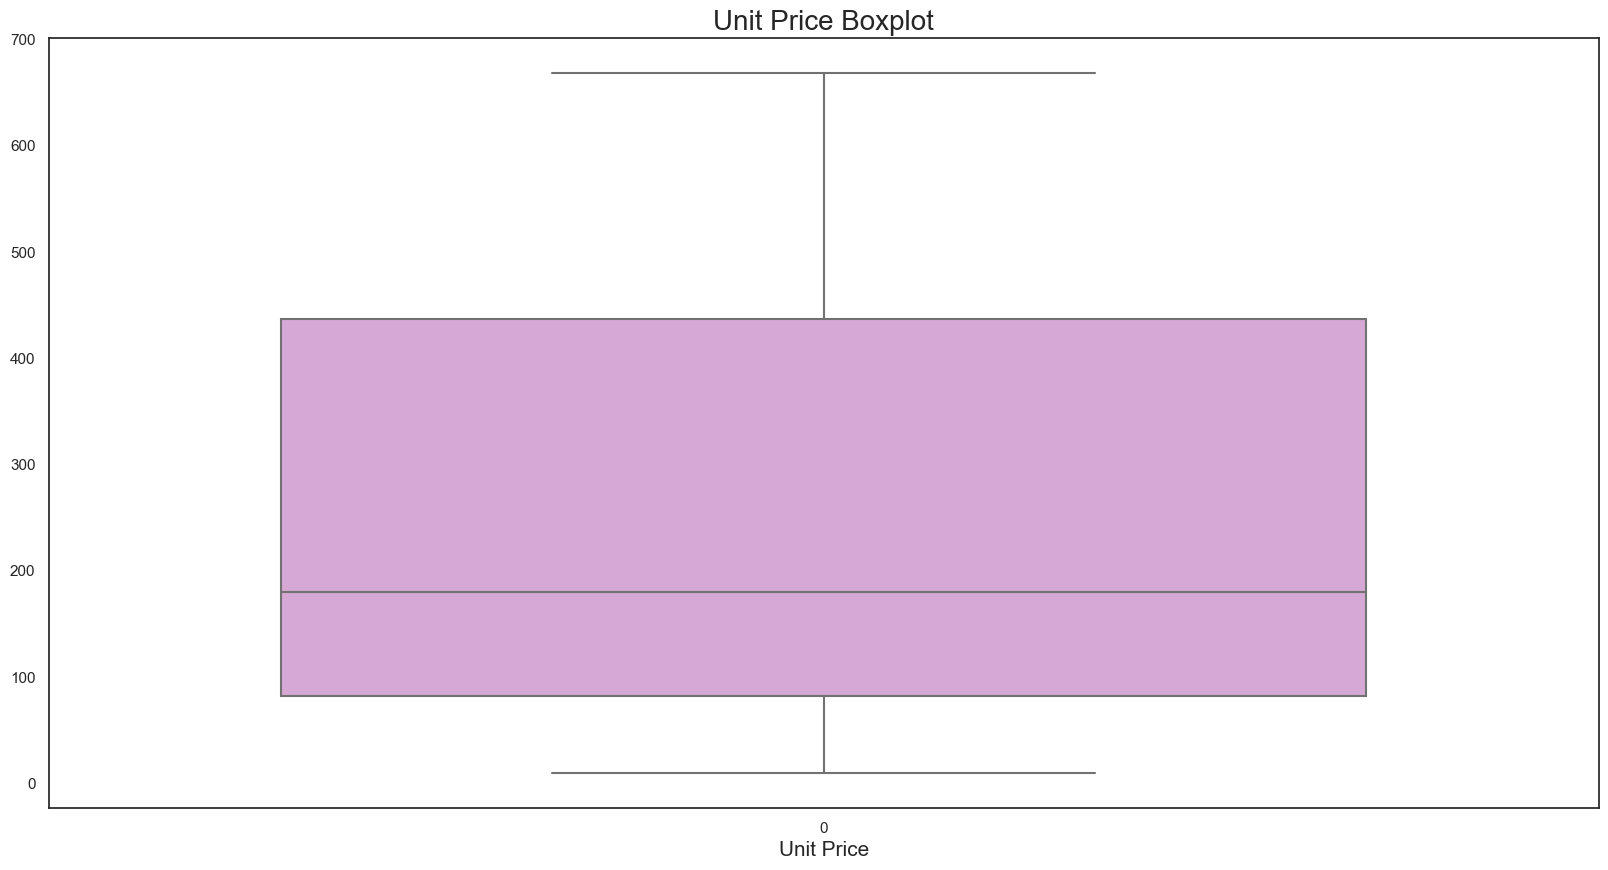

In [155]:
# Box Plot for Unit Price

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(df['Unit Price'], color="plum", width=.7, ax=ax)
plt.title('Unit Price Boxplot', fontsize=20)
plt.xlabel('Unit Price', fontsize=15)
plt.show()

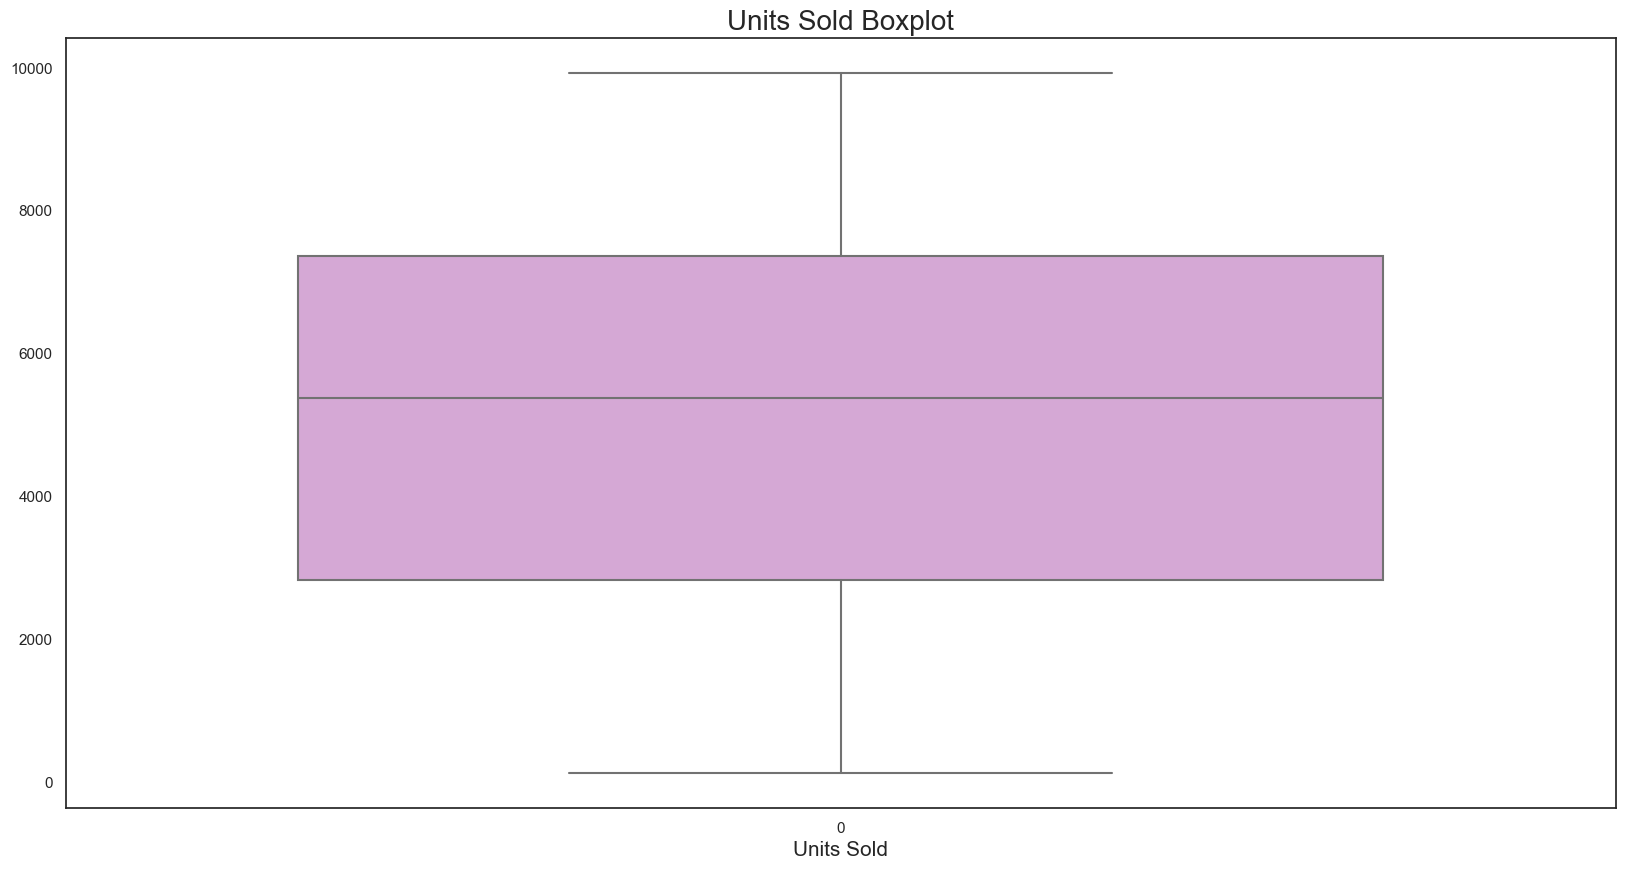

In [157]:
# Box Plot for Units Sold

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(df['Units Sold'], color="plum", width=.7, ax=ax)
plt.title('Units Sold Boxplot', fontsize=20)
plt.xlabel('Units Sold', fontsize=15)
plt.show()

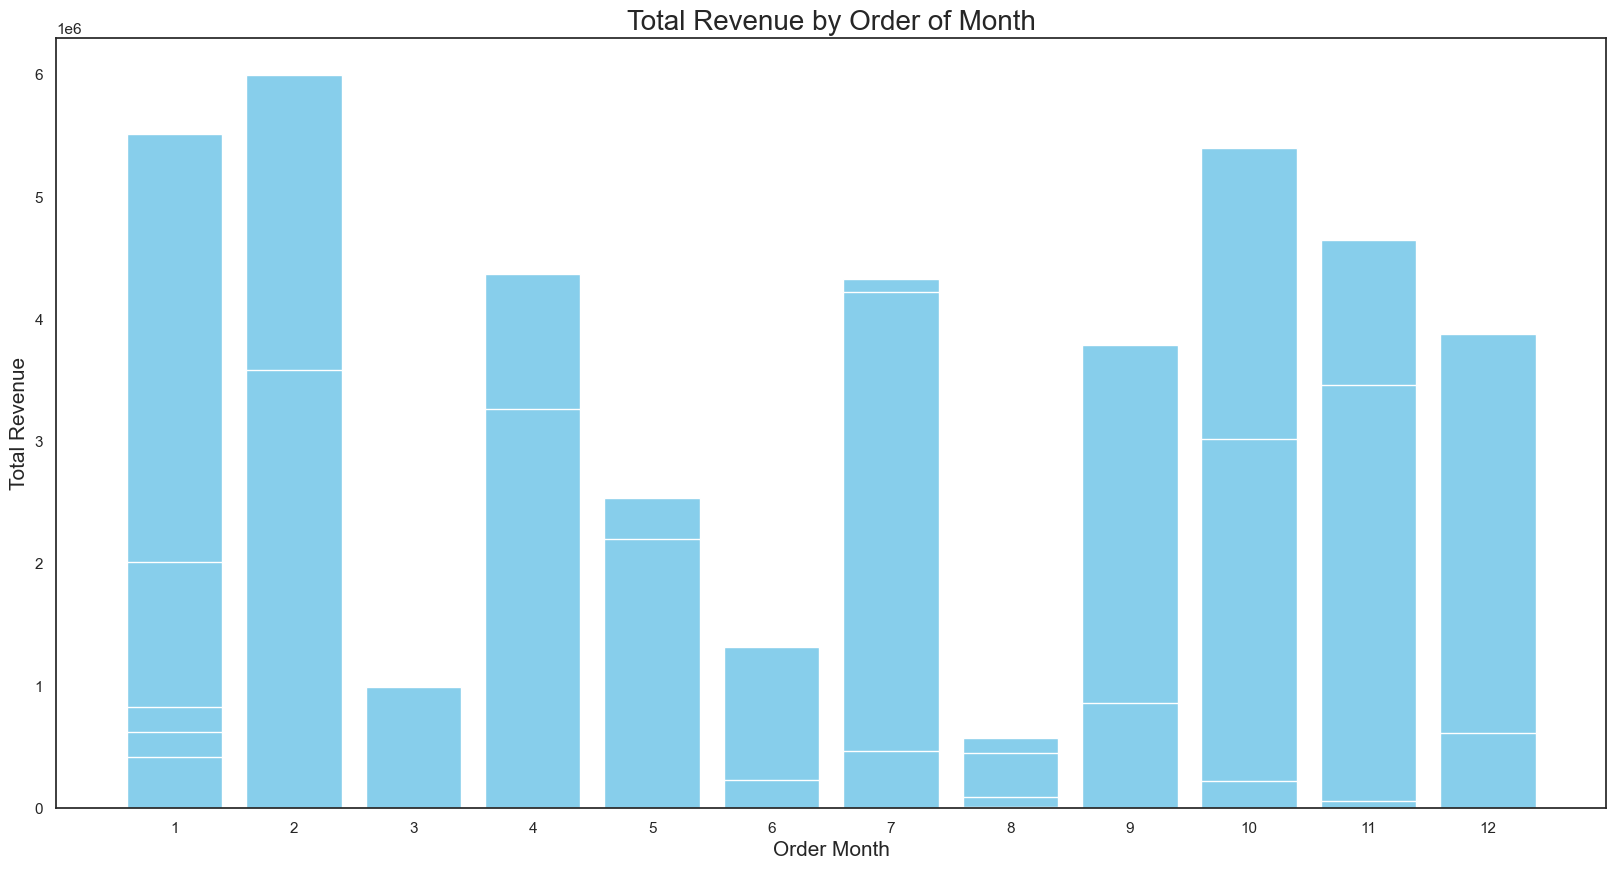

In [159]:
# Bar Chart for Total Revenue by Order Month

import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(20, 10))
plt.bar(df['Order Month'], df['Total Revenue'], color='skyblue')

plt.title('Total Revenue by Order of Month', fontsize=20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Revenue', fontsize=15)

plt.show()

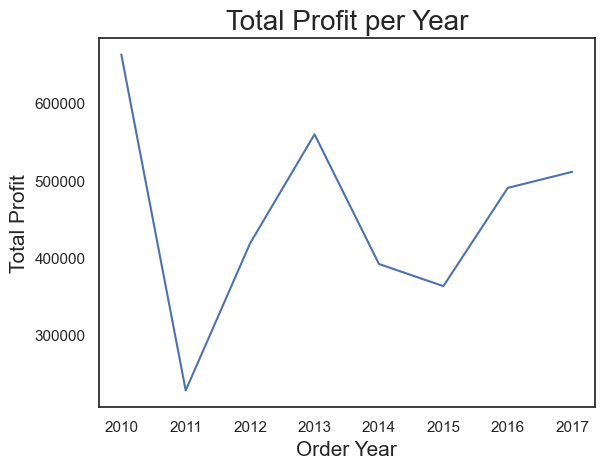

In [173]:
# Line Graph of Total Profit by Order Year

import matplotlib.pyplot as plt
import pandas as pd

df.groupby('Order Year')['Total Profit'].mean().plot()
plt.title('Total Profit per Year', fontsize=20)
plt.xlabel('Order Year', fontsize=15)
plt.ylabel('Total Profit', fontsize=15)

plt.show()

In [9]:
# Calculating the Total Revenue for each group with respect to Item Type

import pandas as pd

df = pd.read_csv('AmazonSalesData.csv')
revenue_by_item_type = df.groupby('Item Type')['Total Revenue'].sum()
revenue_by_item_type_sorted = revenue_by_item_type.sort_values(ascending=False)

print(revenue_by_item_type_sorted)

Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64


In [25]:
# Calculating the Total Profit for each group with respect to Item Type

import pandas as pd

df = pd.read_csv('AmazonSalesData.csv')
profit_by_item_type = df.groupby('Item Type')['Total Profit'].sum()
profit_by_item_type = profit_by_item_type.sort_values(ascending=False)

print(profit_by_item_type)

Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64


In [15]:
# Calculating Correlation of Total Revenue, Total Cost and Total Profit

import pandas as pd

correlation_matrix = df[['Total Revenue', 'Total Cost', 'Total Profit']].corr()

print(correlation_matrix)

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000


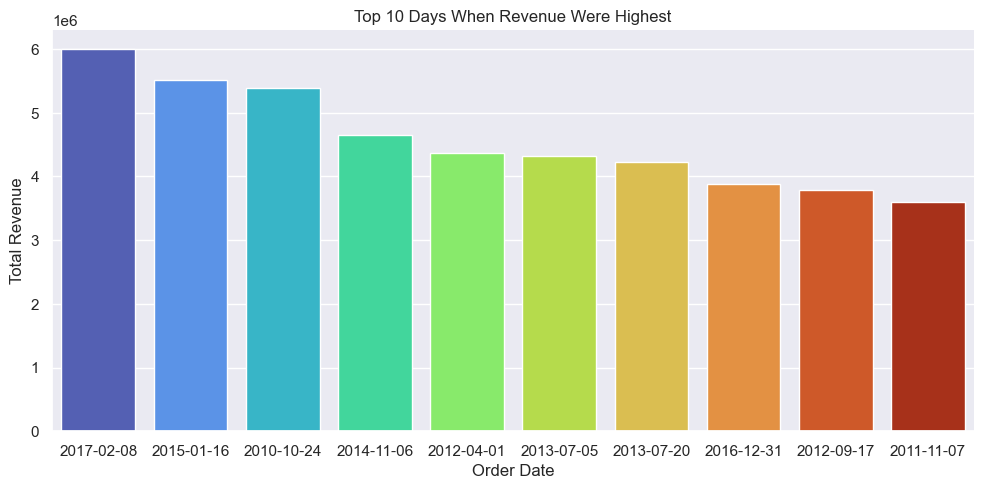

In [38]:
# Top 10 Days when the Revenue were Highest

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
DaySalesInsights = df.copy()
DaySalesInsights['Order Date'] = pd.to_datetime(df['Order Date']).dt.date

top10sales = DaySalesInsights.groupby('Order Date').sum().sort_values('Total Revenue', ascending=False)
top10sales = top10sales.reset_index().head(10)

sns.catplot(y='Total Revenue', x='Order Date', data=top10sales, aspect=2, palette='turbo', kind="bar")
plt.title('Top 10 Days When Revenue Were Highest')
plt.show()

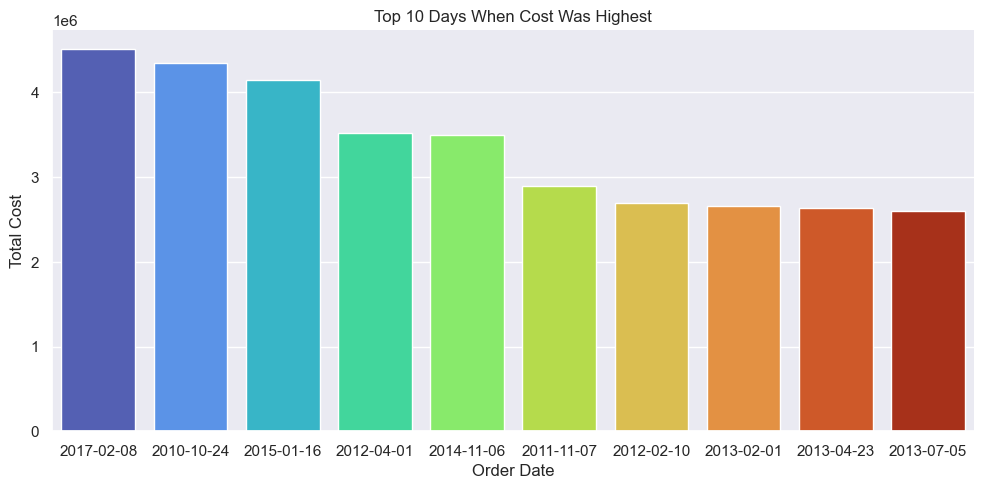

In [40]:
# Top 10 Days when the Cost was Highest

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
DaySalesInsights = df.copy()
DaySalesInsights['Order Date'] = pd.to_datetime(df['Order Date']).dt.date

top10sales = DaySalesInsights.groupby('Order Date').sum().sort_values('Total Cost', ascending=False)
top10sales = top10sales.reset_index().head(10)

sns.catplot(y='Total Cost', x='Order Date', data=top10sales, aspect=2, palette='turbo', kind="bar")
plt.title('Top 10 Days When Cost Was Highest')
plt.show()

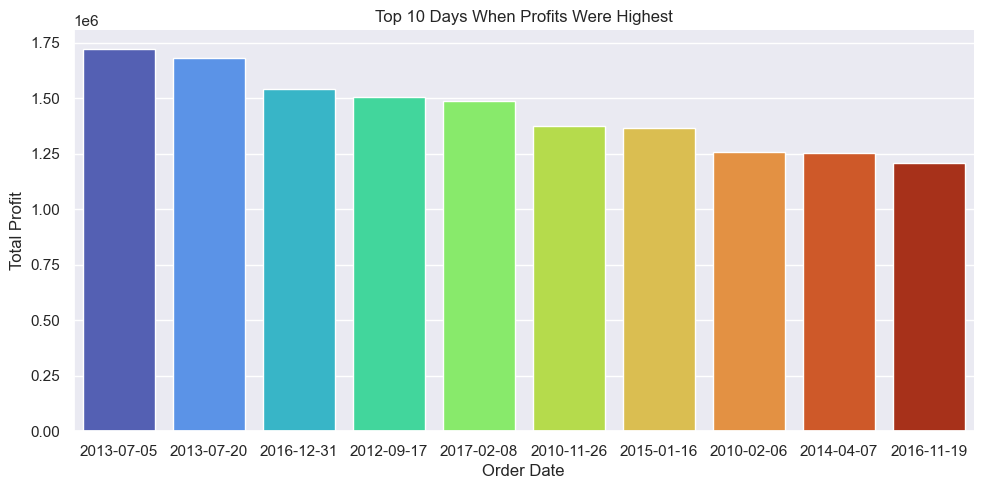

In [44]:
# Top 10 Days when the Profits were Highest

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
DaySalesInsights = df.copy()
DaySalesInsights['Order Date'] = pd.to_datetime(df['Order Date']).dt.date

top10sales = DaySalesInsights.groupby('Order Date').sum().sort_values('Total Profit', ascending=False)
top10sales = top10sales.reset_index().head(10)

sns.catplot(y='Total Profit', x='Order Date', data=top10sales, aspect=2, palette='turbo', kind="bar")
plt.title('Top 10 Days When Profits Were Highest')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


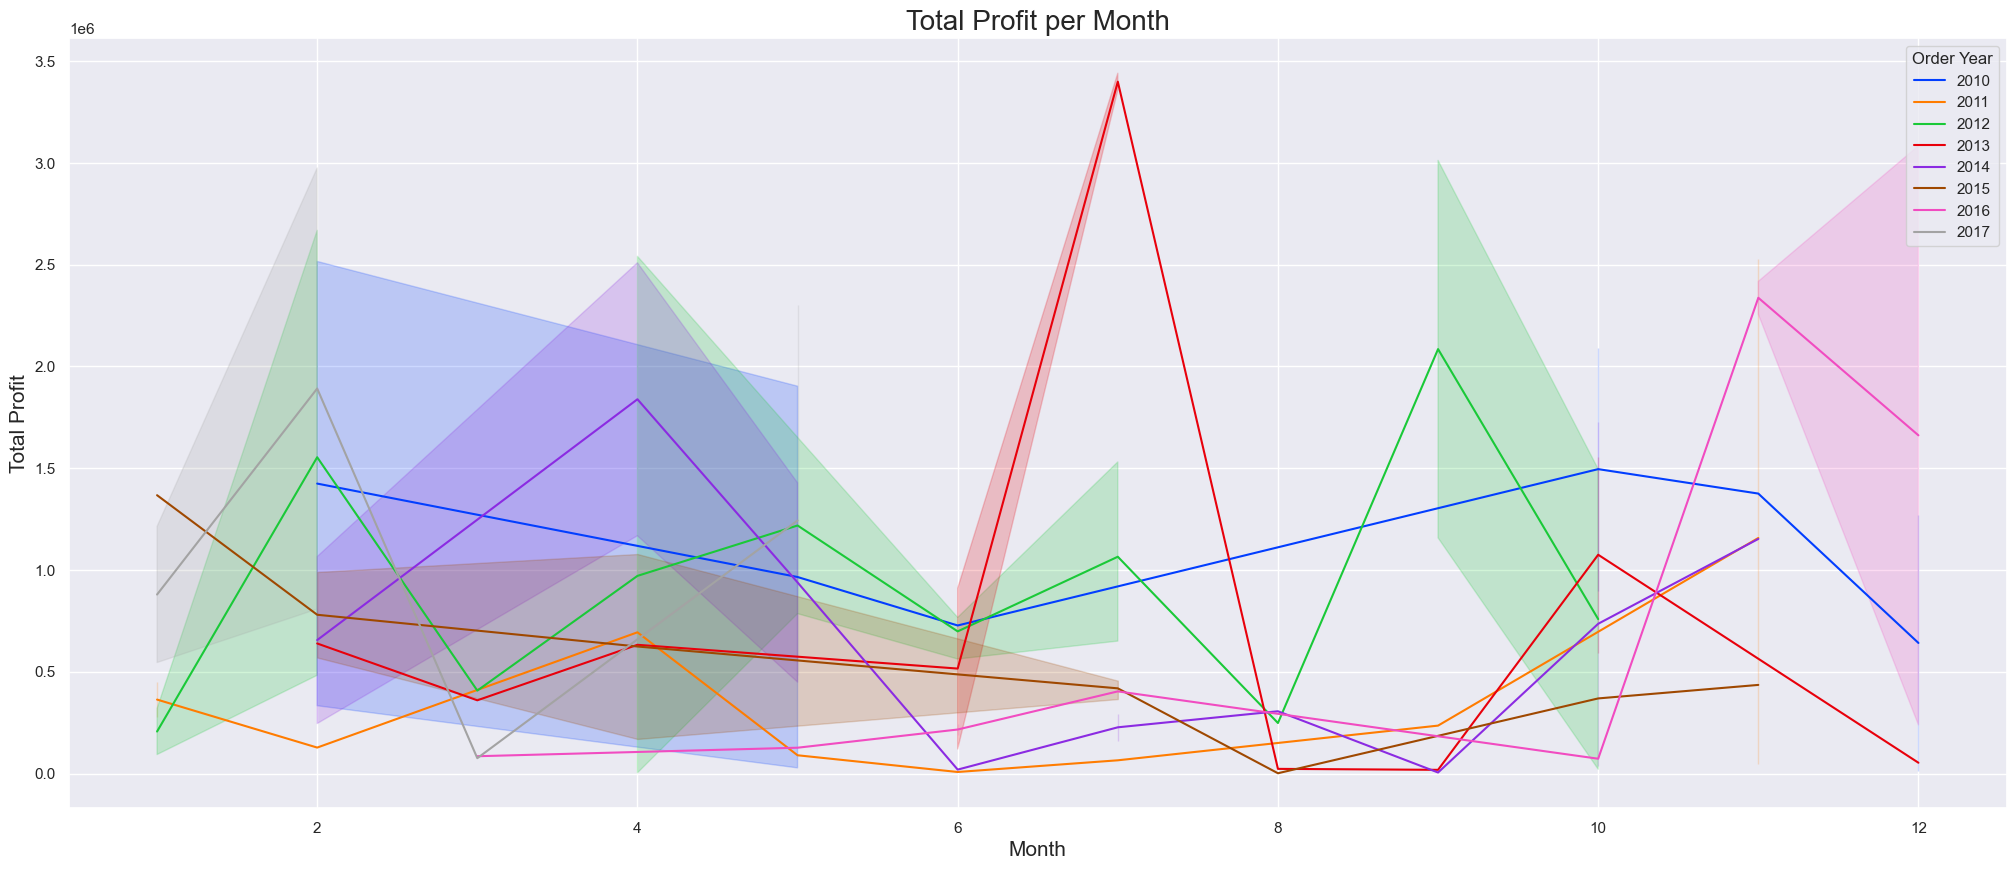

In [85]:
# Create a Line Chart to Plot Total Profit per Month

plt.figure(figsize=(25, 10))
sns.lineplot(x='Order Month', y='Total Profit', data=df, estimator=sum, hue='Order Year', palette='bright')
plt.title('Total Profit per Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Total Profit', fontsize=15)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


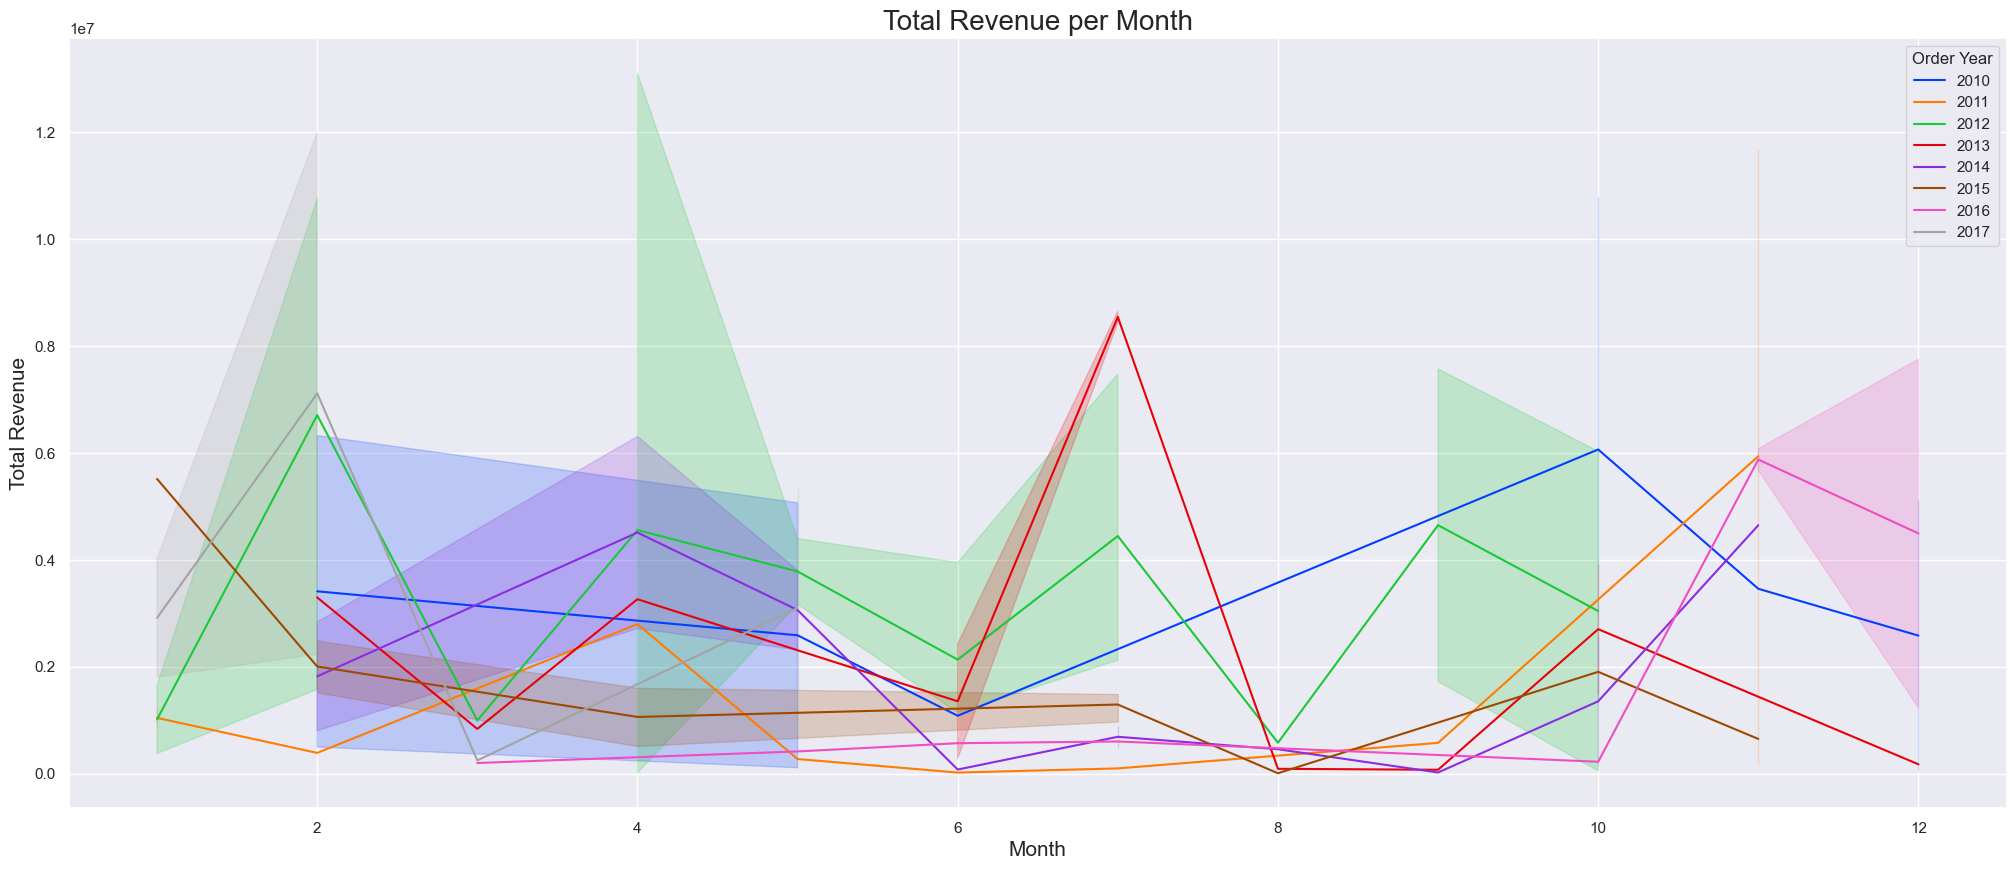

In [87]:
# Create a Line Chart to Plot Total Profit per Month

plt.figure(figsize=(25, 10))
sns.lineplot(x='Order Month', y='Total Revenue', data=df, estimator=sum, hue='Order Year', palette='bright')
plt.title('Total Revenue per Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Total Revenue', fontsize=15)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


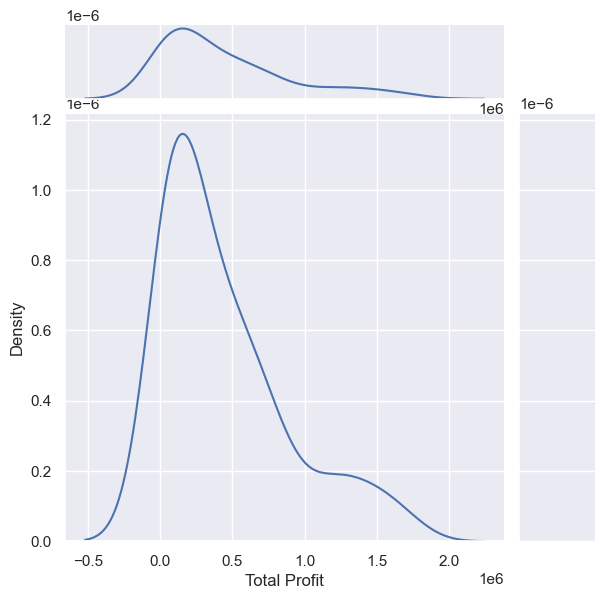

In [111]:
sns.jointplot(x='Total Profit', data=df, kind='kde')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


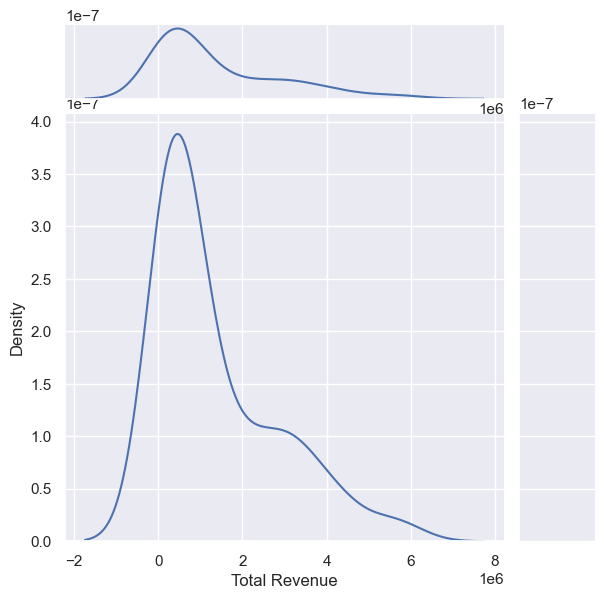

In [109]:
sns.jointplot(x='Total Revenue', data=df, kind='kde')